## Modelo K-means

In [3]:
#Cargar las Librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Calculo numérico y el análisis de datos
import seaborn as sns # Creación graficos estadisticos
import matplotlib.pyplot as plt # Creación de graficos en dos dimensiones
import plotly.graph_objs as go # Creacion de graficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# Librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows
import warnings
warnings.filterwarnings('ignore')

In [4]:
 # Lectura de datos en Python para cargarlos en la variable Datos
Datos = pd.read_csv('D:/UNAD/Evidencias de Aprendizaje/Semestre 9/Análisis de Datos/Tarea 4/DataSet/Mall_Customers.csv')

In [5]:
# Se realizo lectura de los datos para el análisis exploratorio
Datos.head(40)


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
#Descripcion de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atipicos')

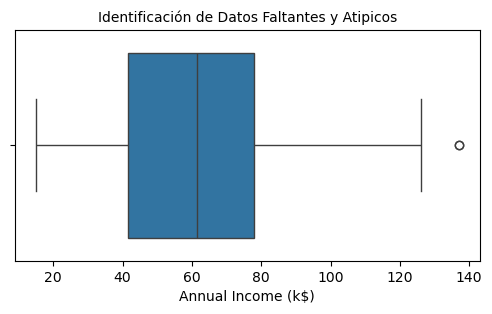

In [7]:
# Identificacion de Datos Faltantes y Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atipicos', fontsize=10 )

##  Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario. 

In [9]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Age: ", Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Annual Income (k$): ", Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Spending Score (1-100): ", Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Age:  0
Cantidad de Registros con cero en Annual Income (k$):  0
Cantidad de Registros con cero en Spending Score (1-100):  0


In [11]:
#Remplazar todos los ceros con el valor medio (promedio de la columna.
Datos['Annual Income (k$)']=Datos['Annual Income (k$)'].replace(0,Datos['Annual Income (k$)'].mean())

Text(0.5, 1.0, 'Identificación de Datos Atipicos')

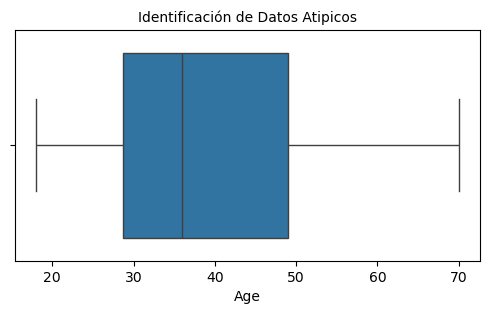

In [13]:
#Identificacion de Datos Atipicos
plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos Atipicos', fontsize=10 )

In [14]:
# Conteo de datos Atípicos
nivel_minimo=18
nivel_maximo=70
Total_Atipicos=((Datos['Age']<nivel_minimo)|(Datos['Age']>nivel_maximo)).sum()
print(" * El total de datos atípicos es {}".format(Total_Atipicos))

 * El total de datos atípicos es 0


In [15]:
#Filtra Datos Atipicos
Datos= Datos[(Datos['Age']<nivel_maximo)&(Datos['Age']>nivel_minimo)]

In [16]:
# Revision del tipo de datos y datos faltantes
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              194 non-null    int64 
 1   Gender                  194 non-null    object
 2   Age                     194 non-null    int64 
 3   Annual Income (k$)      194 non-null    int64 
 4   Spending Score (1-100)  194 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 9.1+ KB


Nos percatamos de que no poseemos datos en blanco ya que todas las columnas tienen 200 observaciones, también no hay datos atípicos por lo que podemos iniciar a entrenar el modelo.

## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características. 

Caracteristicas de interes para el agrupamiento
* Edad (age)
* ingreso (Annual Income (k$))
* Puntaje de Gasto (Spending Score) 

In [18]:
# Filtrar columnas del modelo
Datos = Datos[["Age","Annual Income (k$)","Spending Score (1-100)"]]

In [19]:
# Revisión de los datos de las variables objetivo

Datos.head(10)

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
5,22,17,76
6,35,18,6
7,23,18,94
8,64,19,3
9,30,19,72


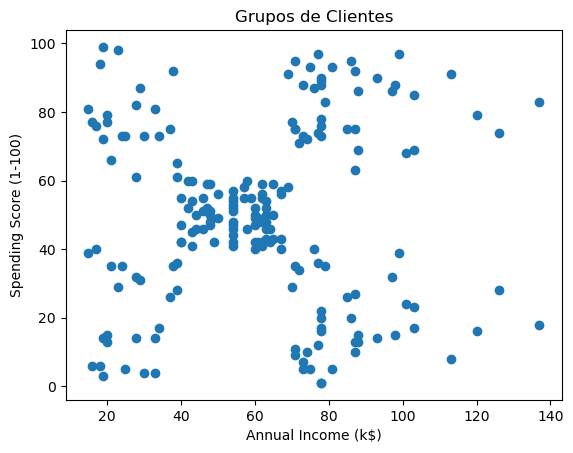

In [21]:
# Gráfica de pre-agrupamiento

plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()



## 4. Entrenar el modelo configurando los diferentes hiperparámetros

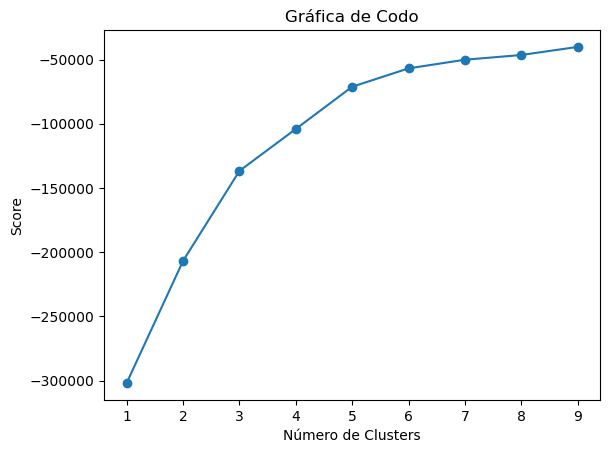

In [22]:
# Se realiza gráfica de codo para identificar valor de los clusters (K)

Nc = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()



In [23]:
# se genera modelo de agrupamiento con K=6 como valor de clusters ( es decir haremos 6 grupos de agrupamiento)

Modelo = KMeans(n_clusters=6, random_state=0)
Modelo.fit(Datos)
 

KMeans(n_clusters=6, random_state=0)

In [24]:
# Agrega columna "Cluster" a la base de dartos para saber el número de cada grupo

Modelo.labels_
Datos["Cluster"] = Modelo.labels_ 
print (Datos)

     Age  Annual Income (k$)  Spending Score (1-100)  Cluster
0     19                  15                      39        2
1     21                  15                      81        5
2     20                  16                       6        2
3     23                  16                      77        5
4     31                  17                      40        2
..   ...                 ...                     ...      ...
195   35                 120                      79        3
196   45                 126                      28        1
197   32                 126                      74        3
198   32                 137                      18        1
199   30                 137                      83        3

[194 rows x 4 columns]


## 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc.


Metricas utilizadas:
* Coeficiente de Silhouette.
* Índice de Calinski-Harabasz.
* Indice Davies Bouldin

In [25]:

# Preparar métrica para la columna "Cluster"
Observaciones = len(Datos)
X = Datos.drop('Cluster', axis=1)
clusters = Datos['Cluster']

# Calculara métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# TTabla para mostrar resultados
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]
# MOSTRAR TABLA
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))



+--------------------------+---------------------+
|          Metric          |        Value        |
+--------------------------+---------------------+
| Numero de Observaciones  |         194         |
|  Coeficiente Silhouette  | 0.42463478648963343 |
| Indice Calinski Harabasz | 139.81633619673383  |
|  Indice Davies Bouldin   | 0.8334006743624284  |
+--------------------------+---------------------+


## 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

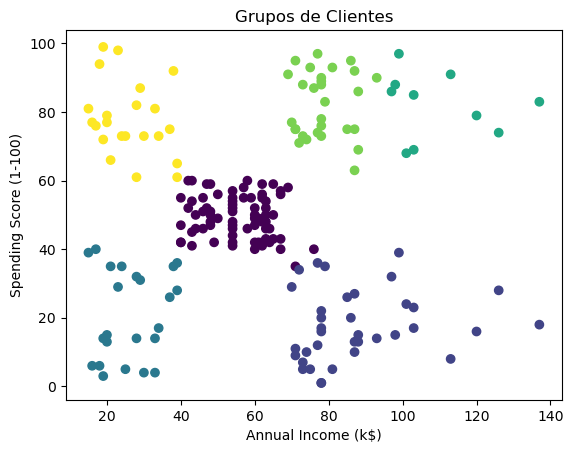

In [27]:
plt.scatter(Datos['Annual Income (k$)'], Datos['Spending Score (1-100)'], c=Datos['Cluster'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()

